In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import matplotlib.cm as cm  # Para usar una paleta de colores continua
from networkx.drawing.nx_agraph import graphviz_layout

def mostrar_grafo(G):
    plt.figure(figsize=(30,30))
    #pos = nx.spring_layout(G,k=1)
    #pos=nx.circular_layout(G)
    #pos=nx.shell_layout(G)
    #pos=nx.random_layout(G)
    #pos = graphviz_layout(G, prog='dot')
    #pos=nx.spectral_layout(G)
    #pos=nx.spiral_layout(G)
    
    pos = nx.spring_layout(G)
    #pos = nx.kamada_kawai_layout(G)
    
    # Obtener todos los valores de profundidad para ajustar el rango de colores
    profundidades = [G.nodes[node].get('profundidad', 0) for node in G.nodes]
    
    # Normalizar las profundidades para asignar colores continuos en una escala
    min_prof, max_prof = min(profundidades), max(profundidades)
    colors = [
        cm.viridis((prof - min_prof) / (max_prof - min_prof)) if max_prof > min_prof else cm.viridis(0.5)
        for prof in profundidades
    ]
    
    nx.draw(G,pos,with_labels=False, node_color=colors, edge_color="gray", node_size=2000, font_size=10)
    # Prepara las etiquetas con atributos de cada nodo
    labels = {node: f"n:{node}\np:{G.nodes[node].get('profundidad', '')}" for node in G.nodes}
    
    # Dibuja las etiquetas de los nodos con sus atributos
    nx.draw_networkx_labels(G, pos, labels, font_size=15, font_color="white")
    
    plt.margins(0.2)
    plt.show()

In [4]:
def dibujar_arbol(grafo, nodo_raiz=1):
    # Asegurarse de que el grafo sea dirigido
    if not nx.is_directed(grafo):
        raise ValueError("El grafo debe ser dirigido.")
    
    # Calcular la distancia desde el nodo raíz a todos los demás nodos
    distancias = nx.single_source_shortest_path_length(grafo, nodo_raiz)
    
    # Crear la estructura de posiciones de nodos
    pos = {nodo_raiz: (0, 0)}  # Posición inicial del nodo raíz en el centro
    nivel_offset = 1.5  # Espaciado inicial en el eje x para los hijos de cada nodo
    procesados = {nodo_raiz}  # Conjunto para marcar nodos ya procesados
    
    def asignar_posiciones(nodo, profundidad, offset_x):
        """ Función recursiva para asignar posiciones a los nodos """
        hijos = list(grafo.successors(nodo))
        num_hijos = len(hijos)
        
        if num_hijos == 0:
            return  # Si no tiene hijos, termina la recursión
        
        # Calcular el espaciado para los hijos basado en el nivel de profundidad
        espacio_hijos = offset_x / max(1, num_hijos - 1)  # Reduce el offset en cada nivel
        
        for i, hijo in enumerate(hijos):
            # Asigna posición al hijo basado en su índice
            pos[hijo] = (
                pos[nodo][0] + (i - (num_hijos - 1) / 2) * espacio_hijos,  # x
                pos[nodo][1] - 0.5  # y, bajamos en el eje vertical para el nivel
            )
            procesados.add(hijo)
            # Llamada recursiva para colocar los descendientes del hijo
            asignar_posiciones(hijo, profundidad + 1, offset_x / 2)
    
    # Iniciar la colocación de nodos desde la raíz
    asignar_posiciones(nodo_raiz, 0, nivel_offset * len(distancias))
    
    # Dibujar el grafo usando las posiciones calculadas
    plt.figure(figsize=(10, 10,))
    nx.draw(grafo, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    
    # Mostrar el gráfico
    plt.title(f'Árbol generado a partir del grafo dirigido (Raíz: Nodo {nodo_raiz})')
    plt.show()

In [6]:
def describir_arbol(G):
    nodes = list(G.nodes)
    string = describir_arbol_aux(nodes[0],G,0)
    print(string)
    
def describir_arbol_aux(nodo, G, profundidad):
    hijos = list(G.successors(nodo))
    resultado = "\t"*profundidad+f"Nodo: {nodo} | Profundidad: {G.nodes[nodo]['profundidad']}\n"
    if hijos != []:
        for hijo in hijos:
            resultado+=describir_arbol_aux(hijo,G,profundidad+1)
    return resultado

In [8]:
def hojas_preorden(G):
    hojas = {n for n, out_d in G.out_degree() if out_d == 0}
    recorrido_preorden = list(nx.dfs_preorder_nodes(G, source=1))
    lista_hojas = [nodo for nodo in recorrido_preorden if nodo in hojas]
    return lista_hojas

#### Al crear el grafo simultáneamente, se aprovecha la estructura del árbol para formarlo. Cada vez que 

In [187]:
import random

def formar_particion_estado_4(n):
    lista_hojas = []
        
    A = nx.DiGraph()
    A.add_node(1, profundidad=0)
    A.graph['altura'] = 0
    
    G = nx.Graph()
    G.add_node(1,contiguos=[])
    
    lista_hojas.append(1)
    nodos=1
    
    for i in range(1,n+1):
        selec = random.choice(lista_hojas)
        profundidad = nx.shortest_path_length(A, source=1,target=selec)+1
        
        if profundidad == 5:
            continue
            
        if profundidad > A.graph['altura']:
            A.graph['altura'] = profundidad
        
        A.add_node(nodos+1,profundidad=profundidad)
        A.add_node(nodos+2,profundidad=profundidad)
        A.add_node(nodos+3,profundidad=profundidad)
        A.add_node(nodos+4,profundidad=profundidad)
        A.add_edges_from([(selec,nodos+1),(selec,nodos+2),(selec,nodos+3),(selec,nodos+4)])
        #print("Añadidos hijos "+str(nodos+1)+" y "+str(nodos+2))
        lista_hojas.append(nodos+1)
        lista_hojas.append(nodos+2)
        lista_hojas.append(nodos+3)
        lista_hojas.append(nodos+4)
        lista_hojas.remove(selec)
        
        # contiguos = [arriba, derecha, abajo, izquierda]
        G.add_node(nodos+1,contiguos=[0,nodos+2,nodos+3,0])
        G.add_node(nodos+2,contiguos=[0,0,nodos+4,nodos+1])
        G.add_node(nodos+3,contiguos=[nodos+1,nodos+4,0,0])
        G.add_node(nodos+4,contiguos=[nodos+2,0,0,nodos+3])
        G.add_edges_from([
            (nodos+1,nodos+2),(nodos+1,nodos+3),
            (nodos+2,nodos+4),(nodos+2,nodos+1),
            (nodos+3,nodos+1),(nodos+3,nodos+4),
            (nodos+4,nodos+2),(nodos+4,nodos+3)
        ])
        
        if G.nodes[selec]['contiguos'] != []:
            c_arr = G.nodes[selec]['contiguos'][0]
            c_der = G.nodes[selec]['contiguos'][1]
            c_aba = G.nodes[selec]['contiguos'][2]
            c_izq = G.nodes[selec]['contiguos'][3]
            
            if c_arr != 0:
                G.add_edges_from([(c_arr,nodos+1),(c_arr,nodos+2)])
            if c_der != 0:
                G.add_edges_from([(c_der,nodos+2),(c_der,nodos+4)])
            if c_aba != 0:
                G.add_edges_from([(c_aba,nodos+3),(c_aba,nodos+4)])
            if c_izq != 0:
                G.add_edges_from([(c_izq,nodos+1),((c_izq,nodos+3))])
                
        G.remove_node(selec)
        
        nodos+=4
    return A,G

In [191]:
A,G = formar_particion_estado_4(2)

Nodo: 1 | Profundidad: 0
	Nodo: 2 | Profundidad: 1
	Nodo: 3 | Profundidad: 1
	Nodo: 4 | Profundidad: 1
	Nodo: 5 | Profundidad: 1
		Nodo: 6 | Profundidad: 2
		Nodo: 7 | Profundidad: 2
		Nodo: 8 | Profundidad: 2
		Nodo: 9 | Profundidad: 2


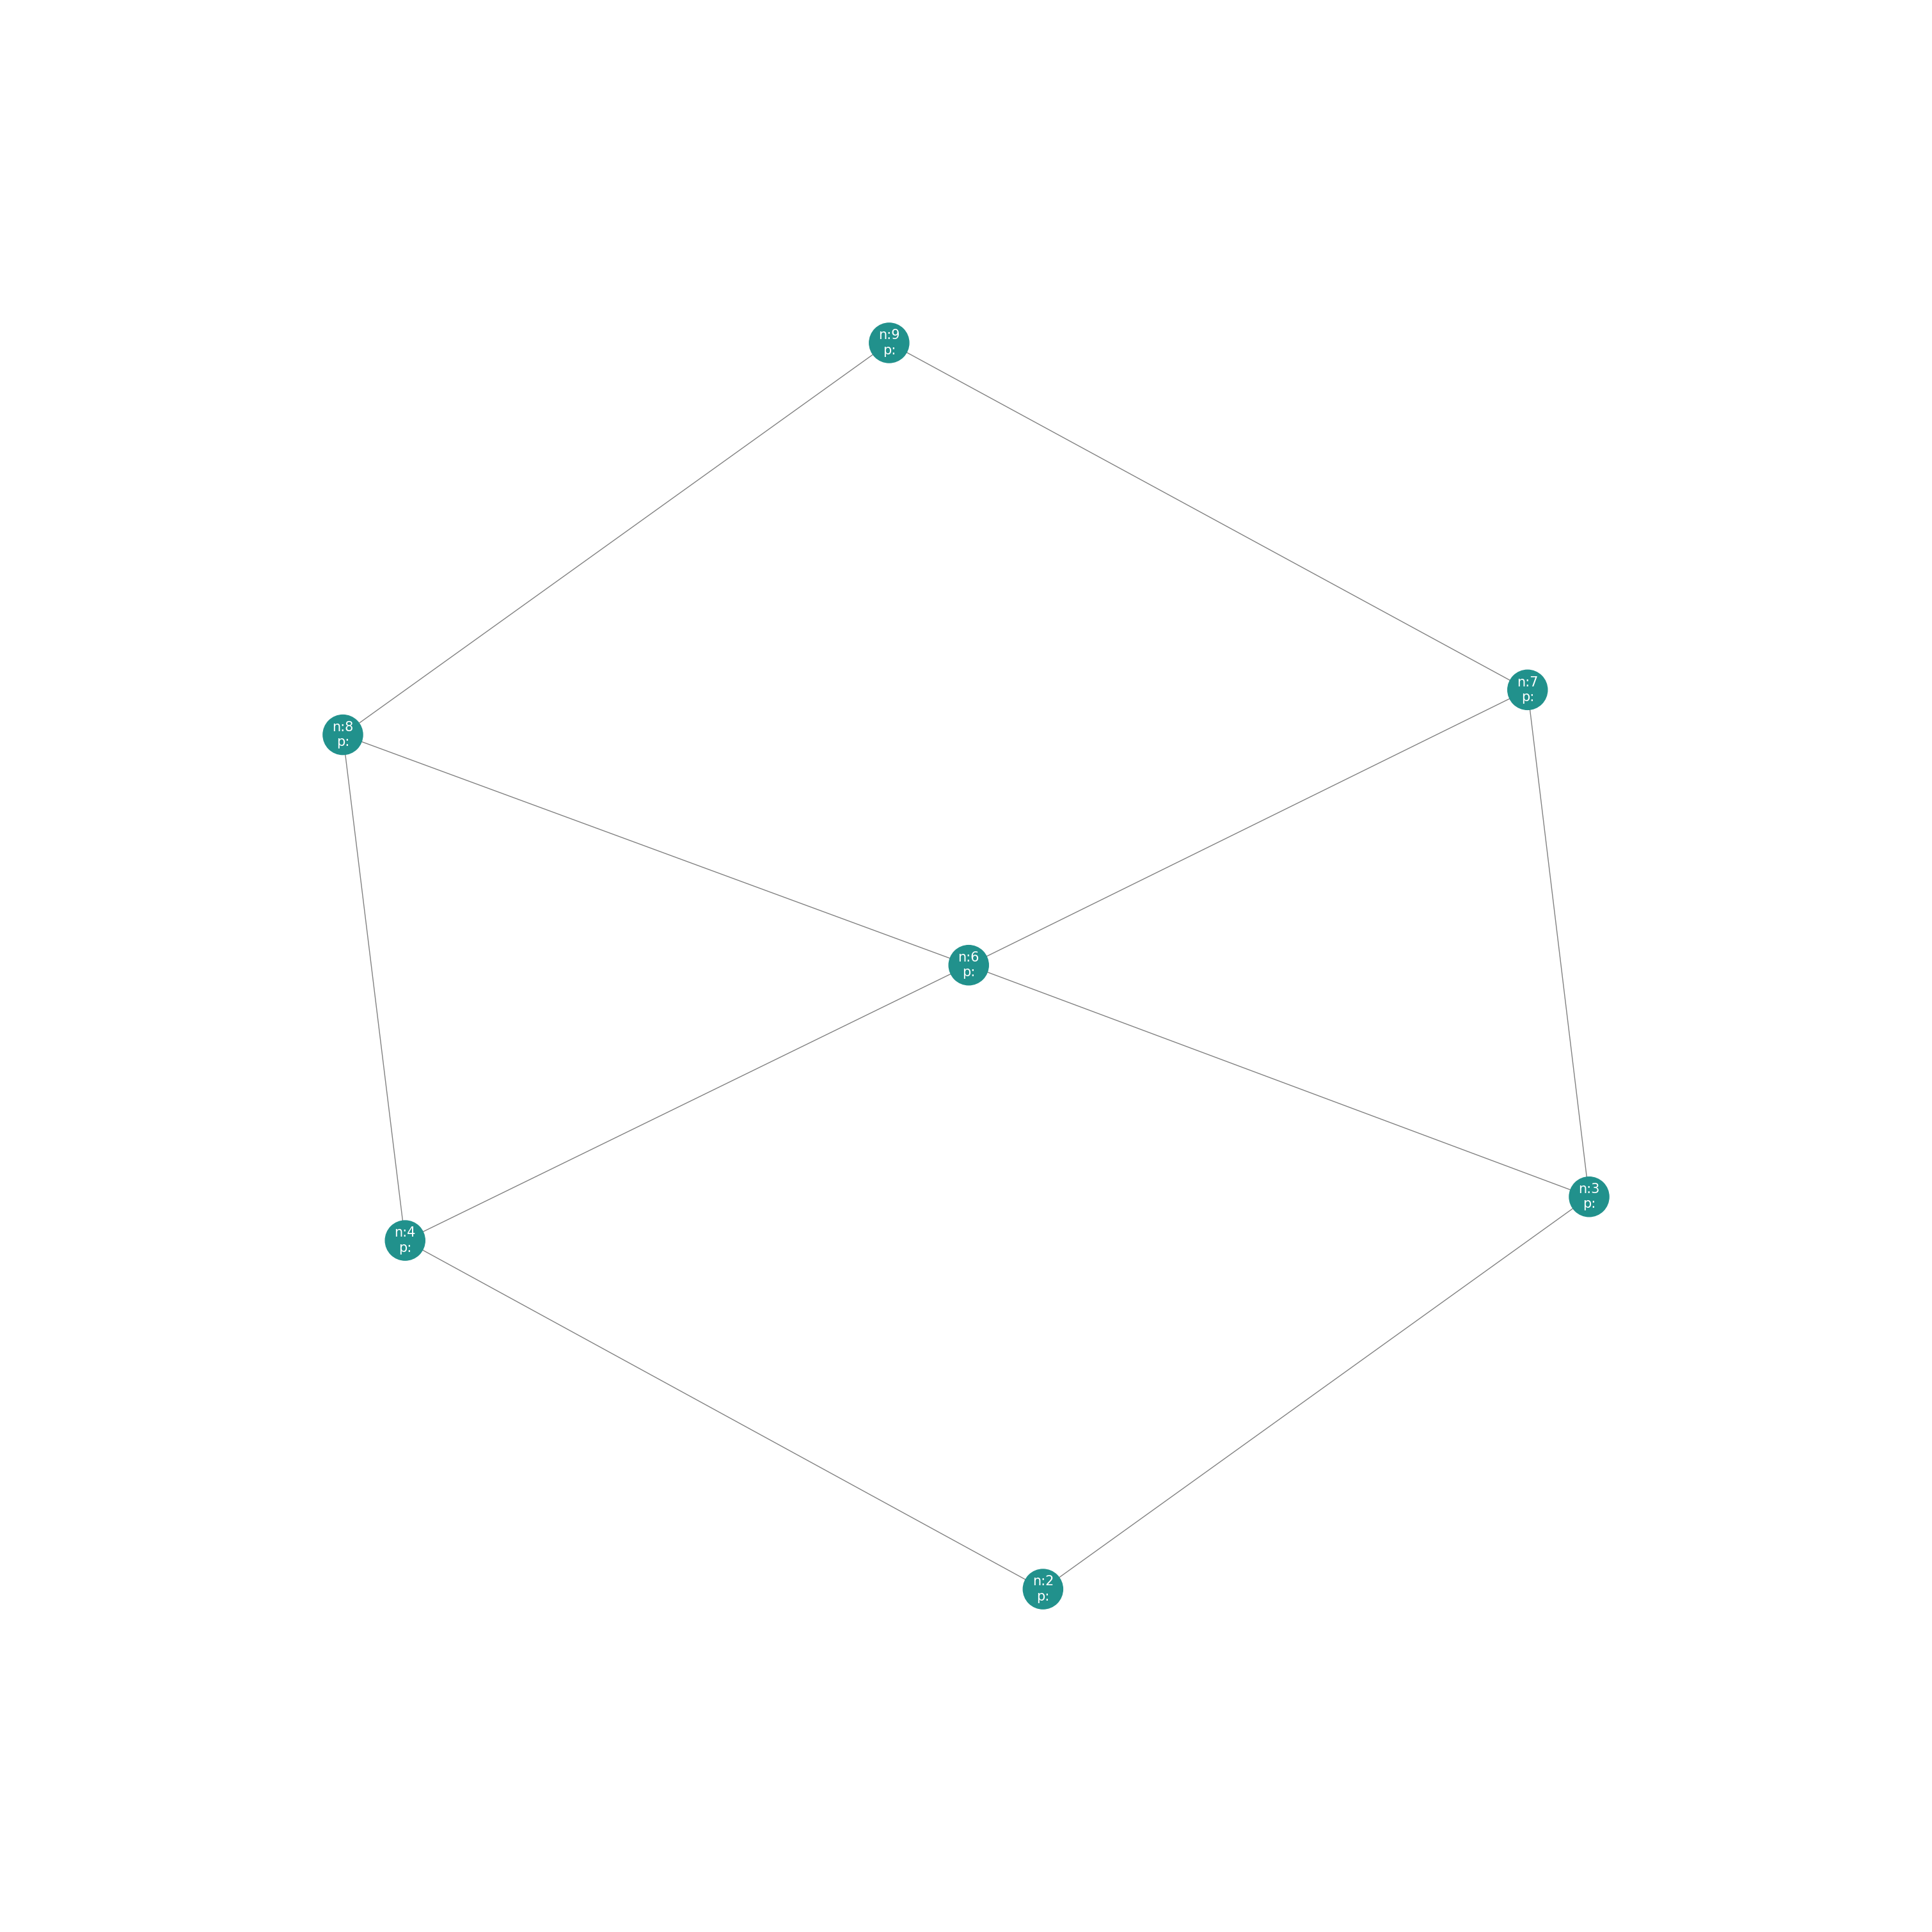

In [192]:
#describir_arbol(A)
#mostrar_grafo(G)

In [9]:
import matplotlib.patches as patches

class Cuadrado():
    def __init__(self, G, nodo=1, centro=(0, 0), tamaño=10):
        self.G=G
        tipos = ['suelo','suelo','pared']
        self.nodo = nodo
        self.centro = centro
        self.tamaño = tamaño
        self.tipo = random.choice(tipos)

        self.profundidad = self.G.graph['altura']

        self.cuadrantes = []

        self.hijos = []

        hijos = list(self.G.successors(nodo))

        if hijos:
            # Se divide por cuatro porque tiene la mitad de tamaño, y después se divide a la mitad otra vez para determinar el centro.
            mitad_tamaño = self.tamaño / 2
            centro_cuadrante = mitad_tamaño / 2
            offsets = [
                (-centro_cuadrante, centro_cuadrante),  # Cuadrante arriba izquierda
                (centro_cuadrante, centro_cuadrante),  # Cuadrante arriba derecha
                (-centro_cuadrante, -centro_cuadrante),  # Cuadrante abajo izquierda
                (centro_cuadrante, -centro_cuadrante)  # Cuadrante abajo derecha
            ]

            for hijo, offset in zip(hijos, offsets):
                nuevo_centro = (self.centro[0] + offset[0], self.centro[1] + offset[1])
                self.cuadrantes.append(Cuadrado(self.G, hijo, nuevo_centro, mitad_tamaño))

    def __str__(self):
        """
        Representación en texto del cuadrado.
        """
        return f"Cuadrado(nodo={self.nodo},tamaño={self.tamaño},tipo={self.tipo},centro={self.centro})"

    def imprimir_estructura(self, nivel=0):
        """
        Imprime la estructura jerárquica del cuadrado.
        """
        print(" " * nivel * 4 + str(self))
        for cuadrante in self.cuadrantes:
            cuadrante.imprimir_estructura(nivel + 1)

    def dibujar(self, ax):
        # Dibuja el cuadrado actual
        x, y = self.centro
        tamaño = self.tamaño
        if self.tipo == 'pared':
            rect = patches.Rectangle(
                (x - tamaño / 2, y - tamaño / 2), tamaño, tamaño,
                linewidth=1, edgecolor='grey', facecolor='black'
            )
            ax.add_patch(rect)
        elif self.tipo == 'suelo':
            rect = patches.Rectangle(
                (x - tamaño / 2, y - tamaño / 2), tamaño, tamaño,
                linewidth=1, edgecolor='grey', facecolor='white'
            )
            ax.add_patch(rect)

        # Dibujar los hijos
        for cuadrante in self.cuadrantes:
            cuadrante.dibujar(ax)

In [10]:
G = formar_particion_estado_4(400)

cuadrado = Cuadrado(G)
cuadrado.imprimir_estructura()


[6, 14, 15, 16, 17, 26, 27, 28, 29, 34, 35, 36, 37, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 82, 83, 84, 85, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 122, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
Cuadrado(nodo=1,tamaño=10,tipo=suelo,centro=(0, 0))
    Cuadrado(nodo=2,tamaño=5.0,tipo=suelo,centro=(-2.5, 2.5))
      

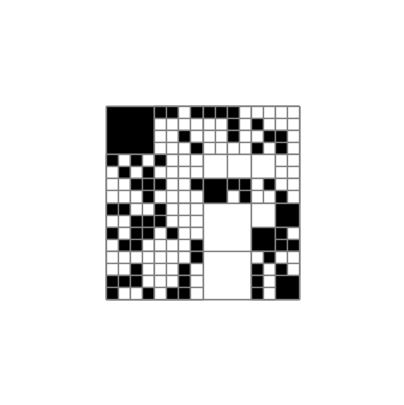

In [11]:
#cuadrado.imprimir_estructura()
#print(cuadrado.profundidad)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.axis('off')

# Configuración del fondo transparente
fig.patch.set_alpha(0)  # Fondo de la figura transparente
ax.patch.set_alpha(0)   # Fondo del eje transparente

cuadrado.dibujar(ax)

plt.show()